# Imports and Catalogues

In [255]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.table import join
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.coordinates import SkyCoord
from scipy.optimize import linear_sum_assignment
import all_fctns
import os


def refresh_module():
    import importlib
    import all_fctns
    importlib.reload(all_fctns)
    
SAMI_Target_catalogues = ("InputCatGAMADR3.fits", "InputCatClustersDR3.fits", "InputCatFiller.fits")
SAMI_regions = {0: "GAMA", 1: "Clusters", 2: "Filler"}

Source_dir ="C:\\Users\\mspan\\OneDrive - The University of Sydney (Students)\\Honours\\Honours Project\\"
catalogue_filepath = Source_dir + "Catalogues\\"
# SAMI_regions = ("Clusters", "Filler", "GAMA")
SAMI_spectra_catalogue = "EmissionLine1compDR3.fits"
SAMI_SFR_catalogue = "AR2022_SAMI_DR3_Mstar_SFR_GSWL_rescaled.fits"
SAMI_AGN_summary_catalogue = "Crossmatched\\SAMI_AGN_matches.fits"
SAMI_cubeobs_catalogue = "CubeObs.fits"

shared_catalogue_filepath = Source_dir +  "SAMI_TOOLS_SMC_MSPA4681\\shared_catalogues\\"
gassig_statistics_catalogue = "gassig_statistics.fits"

ifs_path = Source_dir + "SAMI_TOOLS_SMC_MSPA4681\\some_sample_ifs\\"




with fits.open(catalogue_filepath + "\\Crossmatched\\SAMI_AGN_matches.fits") as SAMI_AGN_matches_hdul:
    Summary_table_hdu = Table(SAMI_AGN_matches_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_SFR_catalogue) as SAMI_SFR_hdul:
    SAMI_SFR_table_hdu = Table(SAMI_SFR_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_spectra_catalogue) as SAMI_spectra_hdul:
    SAMI_spectra_table_hdu = Table(SAMI_spectra_hdul[1].data)

with fits.open(catalogue_filepath + SAMI_cubeobs_catalogue) as SAMI_CubeObs_hdul:
    SAMI_CubeObs_table_hdu =  Table(SAMI_CubeObs_hdul[1].data)

with fits.open(shared_catalogue_filepath + gassig_statistics_catalogue) as gassig_statistics_hdul:
    gassig_statistics_table = Table(gassig_statistics_hdul[1].data)

all_SAMI_targets_table = all_fctns.get_all_SAMI_targets_catalogue(catalogue_filepath, SAMI_Target_catalogues)

# sdss gal spec lines
with fits.open(Source_dir + "galSpecLine-dr8.fits") as sdss_galspec_hdul:
    sdss_galspec_table = Table(sdss_galspec_hdul[1].data)

BPT_values = (0,1,2,3,4,5,6,7,8,9,10,-1)
BPT_labels = ('HII', 'HII/Comp', 'Comp', 'AGN/Comp', 'HII/Comp/AGN', 'HII/AGN', 'LINER', 'Seyfert', 'Boundary AGN', 'AGN OIII', 'AGN - NII limit only', 'Inconclusive')
BPT_colors = ('red', 'orangered', 'orange', 'purple',      'magenta',     'pink',  'green', 'blue',    'cyan',         'blue',     'green',    'black')
BPT_marker = ('o',      'o',    'o',        'o',        'o',            'o',    'o',        'o',    'o',            's',        's',        'x')

full_BPT_classification_dict = {i: (label, color, marker) for i, label, color, marker in zip(BPT_values, BPT_labels, BPT_colors, BPT_marker)}

Combine SAMI Targets Table Saved to: C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Catalogues\ALL_SAMI_TARGETS.fits


# Spectrum Comparison Plot

<>:35: SyntaxWarning: invalid escape sequence '\A'
<>:35: SyntaxWarning: invalid escape sequence '\A'
C:\Users\mspan\AppData\Local\Temp\ipykernel_14508\1636723975.py:35: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Rest Wavelength ($\AA$)')


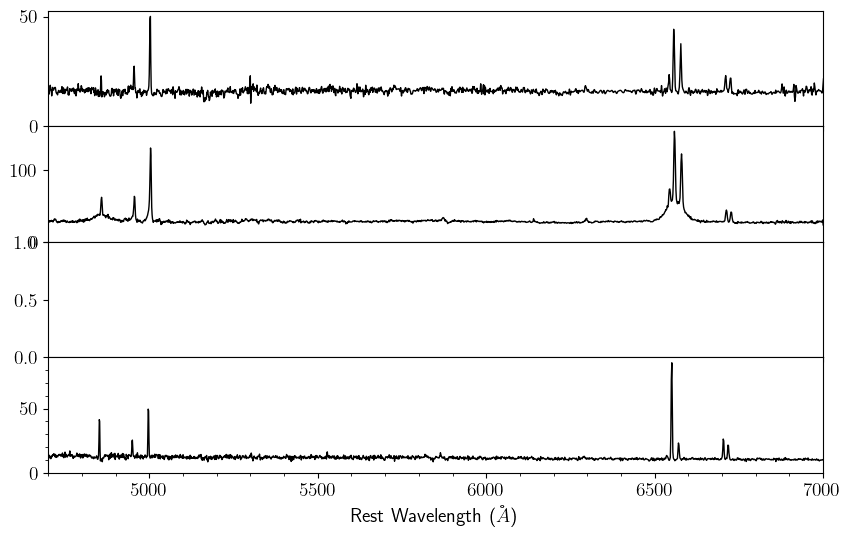

Figure saved to C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Thesis\Images\AGNTypesSpectra.pdf


In [334]:
# get SDSS spectra
HII_spectra_catid = 9163
Seyfert2_spectra_catid = 376478
Seyfert1_spectra_catid = 376679

flux_quality = 1 # 1 for raw, 2 for fit

HII_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{HII_spectra_catid}.csv", delimiter=',', skiprows=1)
HII_spectra_wavelengths = HII_spectra[:, 0] / (1+ Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == HII_spectra_catid])
HII_spectra_flux = HII_spectra[:, flux_quality]

Seyfert2_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{Seyfert2_spectra_catid}.csv", delimiter=',', skiprows=1)
Seyfert2_spectra_wavelengths = Seyfert2_spectra[:, 0] / (1 + Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == Seyfert2_spectra_catid])
Seyfert2_spectra_flux = Seyfert2_spectra[:, flux_quality]

Seyfert1_spectra = np.loadtxt(Source_dir + f"SAMI_TOOLS_SMC_MSPA4681\\sdss_spec\\{Seyfert1_spectra_catid}.csv", delimiter=',', skiprows=1)
Seyfert1_spectra_wavelengths = Seyfert1_spectra[:, 0] / (1 + Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == Seyfert1_spectra_catid])
Seyfert1_spectra_flux = Seyfert1_spectra[:, flux_quality]

fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0) # Set vertical spacing to 0
axs[3].minorticks_on()

axs[0].plot(Seyfert2_spectra_wavelengths, Seyfert2_spectra_flux, 'k', label='Seyfert 2 Spectrum', lw=1)

axs[1].plot(Seyfert1_spectra_wavelengths, Seyfert1_spectra_flux, 'k', label='Seyfert 1 Spectrum', lw=1)

axs[3].plot(HII_spectra_wavelengths, HII_spectra_flux,  'k', label='HII Spectrum', lw=1)

for ax in axs:
    ax.set_ylim(0, ax.get_ylim()[1])
    

plt.xlim(4700, 7000)
plt.xlabel('Rest Wavelength ($\AA$)')
plt.show()
# plt.show()

save_figure = True
if save_figure:
    figname = 'AGNTypesSpectra.pdf'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname, bbox_inches='tight', dpi=300)
    print(f"Figure saved to {savepath+ figname}")

# BPT Diagram

1843200
287112


C:\Users\mspan\AppData\Local\Temp\ipykernel_14508\556410573.py:16: RuntimeWarning: invalid value encountered in divide
  sn_mask = (halpha/halpha_err > sn_lim) & (hbeta/hbeta_err > sn_lim) & (OIII/OIII_err > sn_lim) & (NII/NII_err > sn_lim)
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\sami_tools_smc_mspa4681\Code\all_fctns.py:35: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.47) + 1.19
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\sami_tools_smc_mspa4681\Code\all_fctns.py:26: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.61/(xbpt-0.05) + 1.3


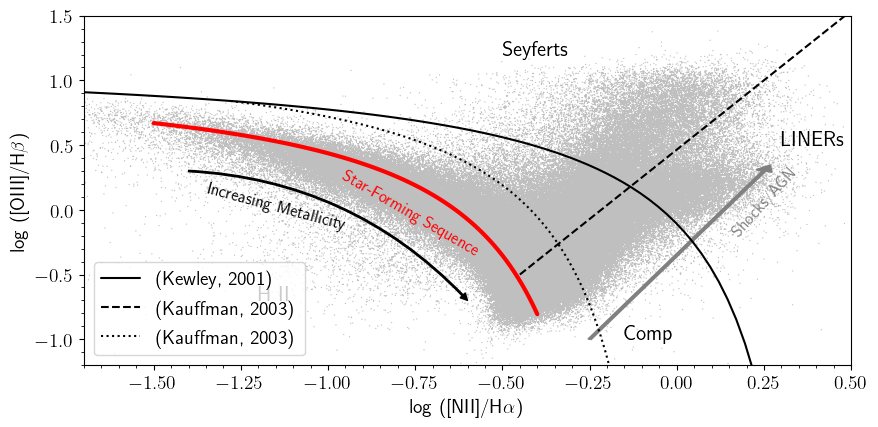

Figure saved to C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Thesis\Images\ExampleBPTDiagram.pdf


In [339]:
refresh_module()

fig, ax = plt.subplots(figsize=(9, 4.5))
plt.rcParams['text.usetex'] = True

label_fontsize = 12
regionlabel_fontsize = 15
# SDSS points
sn_lim = 5
halpha, halpha_err = sdss_galspec_table['H_ALPHA_FLUX'], sdss_galspec_table['H_ALPHA_FLUX_ERR']
hbeta, hbeta_err = sdss_galspec_table['H_BETA_FLUX'], sdss_galspec_table['H_BETA_FLUX_ERR']
OIII, OIII_err = sdss_galspec_table['OIII_5007_FLUX'], sdss_galspec_table['OIII_5007_FLUX_ERR']
NII, NII_err = sdss_galspec_table['NII_6584_FLUX'], sdss_galspec_table['NII_6584_FLUX_ERR']
print(len(halpha))

sn_mask = (halpha/halpha_err > sn_lim) & (hbeta/hbeta_err > sn_lim) & (OIII/OIII_err > sn_lim) & (NII/NII_err > sn_lim)
print(np.sum(sn_mask))

log_NII_halpha = np.log10( NII[sn_mask] / halpha[sn_mask])
log_OIII_hbeta = np.log10( OIII[sn_mask] / hbeta[sn_mask])

plt.rcParams['lines.solid_capstyle'] = 'round'
def expand(x, y, gap=1e-7):
    add = np.tile([0, gap, np.nan], len(x))
    x1 = np.repeat(x, 3) + add
    y1 = np.repeat(y, 3) + add
    return x1, y1

x1 = log_NII_halpha
y1 = log_OIII_hbeta
# plt.scatter(log_NII_halpha, log_OIII_hbeta, s=9, lw=0, alpha=0.2)
ax.plot(*expand(x1, y1), lw=1, color="grey", alpha=0.5)



# plt.scatter(data['log_NII_Ha'], data['log_OIII_Hb'], s=9, lw=0, alpha=0.5)

all_fctns.plot_BPT_lines(ax, 'N II', AGN_cutoffs=False, region_labels=False)

# shock path
plt.arrow(-0.25, -1, 0.5, 1.3, width=0.01, head_width=0.05, head_length=0.05, fc='grey', ec='grey')
plt.text(0.15, -0.2, 'Shocks/AGN', fontsize=label_fontsize, rotation=48, c='grey')

# star-forming sequence
x = np.linspace(-1.5, -0.4, 100)
starforming_sequence = lambda xbpt: 0.61 / (xbpt+ 0.08) +1.10
plt.plot(x, starforming_sequence(x), 'r-', lw=3)
plt.text(-0.97, -0.36, 'Star-Forming Sequence', c='r', rotation=-30, fontsize=label_fontsize)


# increasign metallicity path
# Draw a curved arrow
start_x, start_y = -1.4, 0.3
end_x, end_y = -0.6, -0.7
ax.annotate(
    "", 
    xy=(end_x, end_y),
    xycoords='data',
    xytext=(start_x, start_y),
    textcoords='data',
    arrowprops=dict(
        color="k",
        connectionstyle="arc3,rad=-0.2",  # Curved connection with radius
        width=1,
        headwidth=5,
        headlength=5
    )
)
# plt.arrow(-1.5, 0.2, 0, -1, width=0.01, head_width=0.03, head_length=0.05, fc='black', ec='black')
plt.text(-1.35, -0.15, 'Increasing Metallicity', fontsize=label_fontsize, rotation=-15)

# region labels
ax.text(-0.5, 1.2, 'Seyferts', size = regionlabel_fontsize)
ax.text(0.3, 0.5, 'LINERs', size=regionlabel_fontsize)
ax.text(-0.15, -1.0, 'Comp', size=regionlabel_fontsize)
ax.text(-1.2, -0.7, 'H II', size=regionlabel_fontsize)


ax.grid(False)
ax.minorticks_on()
plt.ylim(-1.2, 1.5)
plt.xlim(-1.7, 0.5)
# plt.xticks(-1.75, 0.5, step=0.05)







plt.tight_layout()
plt.show()

save_figure = True
if save_figure:
    figname = 'ExampleBPTDiagram.pdf'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname, bbox_inches='tight', dpi=300)
    print(f"Figure saved to {savepath+ figname}")


# Example SAMI Data Products

Figure saved to C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Thesis\Images\ExampleSAMIDataSOV.pdf


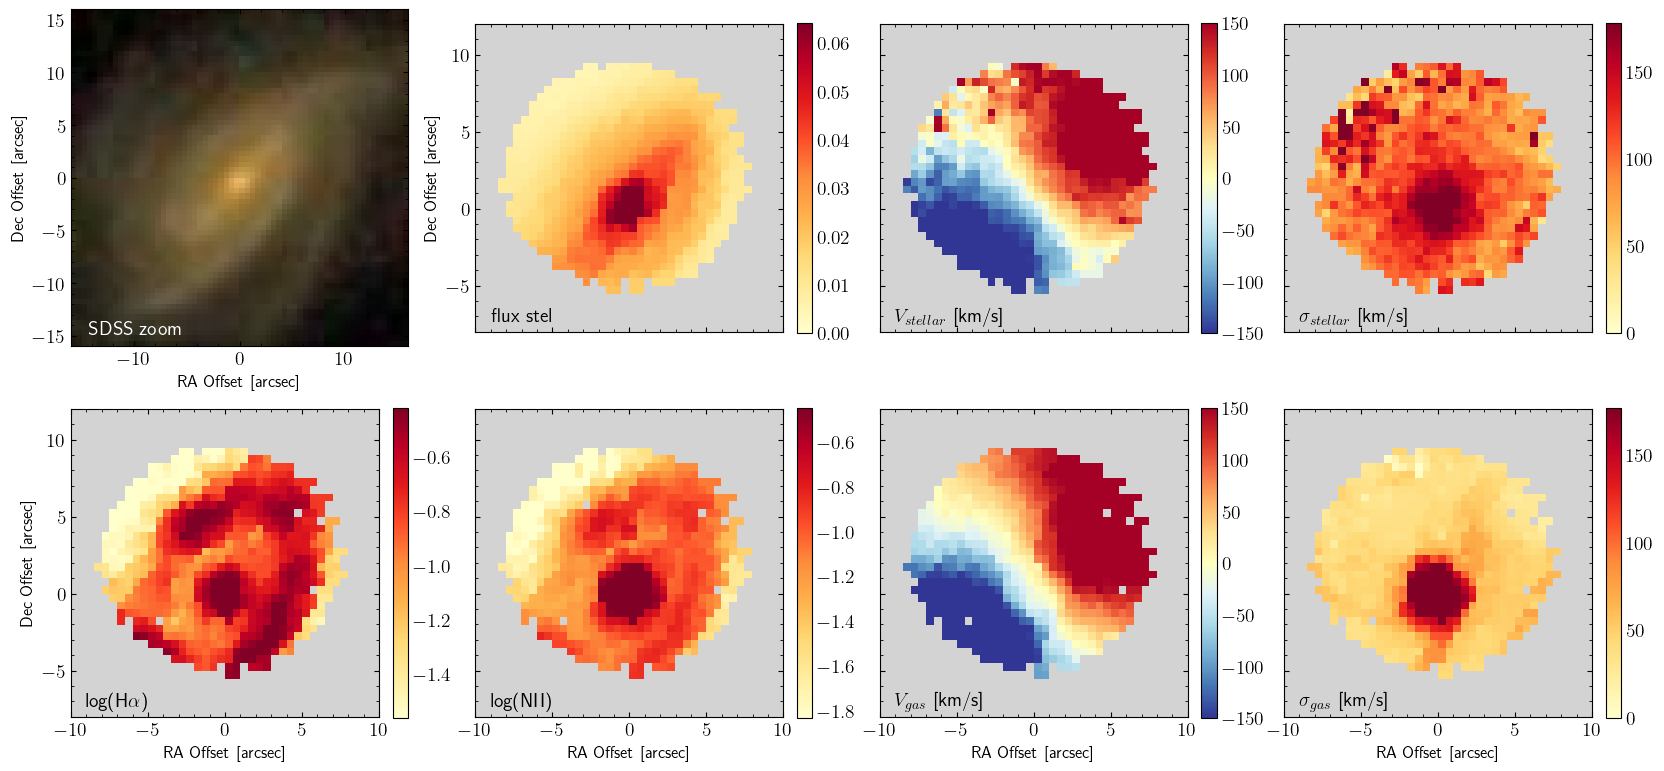

In [333]:
from urllib.parse import urlencode
from urllib.request import urlretrieve
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

catid = 251887
ra = all_SAMI_targets_table['RA_OBJ'][all_SAMI_targets_table['CATID'] == catid][0]
dec = all_SAMI_targets_table['DEC_OBJ'][all_SAMI_targets_table['CATID'] == catid][0]
z = Summary_table_hdu['Z_SPEC'][Summary_table_hdu['CATID'] == catid][0]
bin='default'
snlim=3

# setup grid
fig = plt.figure(1, tight_layout=True, figsize=(20, 10))
fig.clf()
fig.tight_layout()

gs = fig.add_gridspec(2, 4, wspace=0.2, hspace=0)

ax11 = fig.add_subplot(gs[0, 0])
ax_stelflux = fig.add_subplot(gs[0, 1])
ax_stelvel = fig.add_subplot(gs[0, 2])
ax_stelsig = fig.add_subplot(gs[0, 3])

ax_gasvel = fig.add_subplot(gs[1, 2])
ax_gassig = fig.add_subplot(gs[1, 3])
ax_haflux = fig.add_subplot(gs[1, 0])
ax_n2flux = fig.add_subplot(gs[1, 1])


centre_x, centre_y = 25.0, 25.0
pix_scale = 0.5 # arcsec/pix
extent = [(0 - centre_x)*pix_scale, (50 - centre_x)*pix_scale, (0 - centre_y)*pix_scale, (50 - centre_y)*pix_scale]

cbar_fraction=0.046
cbar_pad=0.04


# get SDSS image cutout
# download SDSS RGB of same size as SAMI IFU:
impix = 50
#imsize = 0.25*u.arcmin
imsize = 0.4166*u.arcmin

cutoutbaseurl = 'https://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=ra,dec=dec, 
                                    width=impix, height=impix, 
                                    scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string
# this downloads the image to your disk
urlretrieve(url, os.path.join(ifs_path, str(catid), 'SDSS_cutout_small.jpg'))
image = Image.open(os.path.join(ifs_path, str(catid), 'SDSS_cutout_small.jpg'))

im_centre_x, im_centre_y = image.size[0]/2, image.size[1]/2

im_extent = [-im_centre_x*pix_scale, (im_centre_x)*pix_scale, -im_centre_y*pix_scale, (im_centre_y)*pix_scale]

ax11.imshow(np.flipud(image),origin='lower',interpolation='nearest', extent=im_extent)
ax11.text(0.05, 0.05,'SDSS zoom',color='w',horizontalalignment='left',verticalalignment='center', transform=ax11.transAxes)


ax_stelvel.set_aspect('equal', 'box')
stelvel_file = os.path.join(ifs_path, str(catid),str(catid)+'_A_stellar-velocity_'+bin+'_two-moment.fits')
stelvel = fits.getdata(stelvel_file, ext=0)
stelflux = fits.getdata(stelvel_file, extname='FLUX')
vmin = -150.0
vmax=150.0
im_stelvel = ax_stelvel.imshow(stelvel,origin='lower',interpolation='nearest',cmap=plt.cm.RdYlBu_r,vmin=vmin,vmax=vmax, extent=extent)
# axins_stelvel = inset_axes(ax_stelvel,width="90%",height="5%",loc='upper center')
# fig.colorbar(im_stelvel, cax=axins_stelvel, orientation="horizontal")
cbar = fig.colorbar(im_stelvel,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)
ax_stelvel.text(0.05, 0.05,'$V_{stellar}$ [km/s]', horizontalalignment='left',verticalalignment='center', transform=ax_stelvel.transAxes)

# plot flux from SAMI:
im_stelflux = ax_stelflux.imshow(stelflux,origin='lower',interpolation='nearest',cmap=plt.cm.YlOrRd,vmin=0.0,vmax=np.nanpercentile(stelflux,98.0), extent=extent)
# axins_stelflux = inset_axes(ax_stelflux,width="90%",height="5%",loc='upper center')
# fig.colorbar(im_stelflux, cax=axins_stelflux, orientation="horizontal")
cbar = fig.colorbar(im_stelflux,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)

# add text on plot $\\sig_{stel}$ [km/s]
ax_stelflux.text(0.05, 0.05,'flux stel', horizontalalignment='left',verticalalignment='center', transform=ax_stelflux.transAxes)


# stellar sigma:
#ax_stelsig = fig1.add_subplot(gs[2,1])
ax_stelsig.set_aspect('equal', 'box')
stelsig_file = os.path.join(ifs_path, str(catid),str(catid)+'_A_stellar-velocity-dispersion_'+bin+'_two-moment.fits')
stelsig = fits.getdata(stelsig_file, ext=0)
vmin = 0.0
vmax=np.nanpercentile(stelsig,95.0)
im_stelsig = ax_stelsig.imshow(stelsig,origin='lower',interpolation='nearest',cmap=plt.cm.YlOrRd,vmin=vmin,vmax=vmax, extent=extent)
# axins_stelsig = inset_axes(ax_stelsig,width="90%",height="5%",loc='upper center')
# fig.colorbar(im_stelsig, cax=axins_stelsig, orientation="horizontal")
cbar = fig.colorbar(im_stelsig,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)
ax_stelsig.text(0.05, 0.05,'$\\sigma_{stellar}$ [km/s] ', horizontalalignment='left',verticalalignment='center', transform=ax_stelsig.transAxes)



# get Halpha early, so we can use it for S/N cuts:
haflux_file = os.path.join(ifs_path, str(catid),str(catid)+'_A_Halpha_'+bin+'_1-comp.fits')
haflux = fits.getdata(haflux_file, ext=0)[0,:,:]
haerr =  fits.getdata(haflux_file, extname='HALPHA_ERR')[0,:,:]
hasn = haflux/haerr
ha_snflag = np.where((hasn > snlim),0,1)

# gas velocity fields:
#ax_gasvel = fig1.add_subplot(gs[2,2])
ax_gasvel.set_aspect('equal', 'box')
gasvel_file = os.path.join(ifs_path, str(catid),str(catid)+'_A_gas-velocity_'+bin+'_1-comp.fits')
gasvel = fits.getdata(gasvel_file, ext=0)[0,:,:]
gasvel_masked = np.ma.masked_array(gasvel,(ha_snflag>0))
vmin = -150.0
vmax=150.0
im_gasvel = ax_gasvel.imshow(gasvel_masked,origin='lower',interpolation='nearest',cmap=plt.cm.RdYlBu_r,vmin=vmin,vmax=vmax, extent=extent)
# axins_gasvel = inset_axes(ax_gasvel,width="90%",height="5%",loc='upper center')
# fig.colorbar(im_gasvel, cax=axins_gasvel, orientation="horizontal")
cbar = fig.colorbar(im_gasvel,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)
ax_gasvel.text(0.05, 0.05,'$V_{gas}$ [km/s]', horizontalalignment='left',verticalalignment='center', transform=ax_gasvel.transAxes)

# gas velocity dispersion fields:
#ax_gassig = fig1.add_subplot(gs[2,3])
ax_gassig.set_aspect('equal', 'box')
gassig_file = os.path.join(ifs_path, str(catid),str(catid)+'_A_gas-vdisp_'+bin+'_1-comp.fits')
gassig = fits.getdata(gassig_file, ext=0)[0,:,:]
gassig_masked = np.ma.masked_array(gassig,(ha_snflag>0))
vmin = 0.0
vmax=np.nanpercentile(gassig,95.0)
im_gassig = ax_gassig.imshow(gassig_masked,origin='lower',interpolation='nearest',cmap=plt.cm.YlOrRd,vmin=vmin,vmax=vmax, extent=extent)
# axins_gassig = inset_axes(ax_gassig,width="90%",height="5%",loc='upper center')
# fig.colorbar(im_gassig, cax=axins_gassig, orientation="horizontal")
cbar = fig.colorbar(im_gassig,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)
ax_gassig.text(0.05, 0.05,'$\\sigma_{gas}$ [km/s] ', horizontalalignment='left',verticalalignment='center', transform=ax_gassig.transAxes)

# line fluxes and ratios:
#ax_haflux = fig1.add_subplot(gs[3,0])
ax_haflux.set_aspect('equal', 'box')
haflux_masked = np.ma.masked_array(haflux,(ha_snflag>0))
vmin = np.log10(np.nanpercentile(haflux,5.0))
vmax=np.log10(np.nanpercentile(haflux,95.0))
im_haflux = ax_haflux.imshow(np.log10(haflux_masked),origin='lower',interpolation='nearest',cmap=plt.cm.YlOrRd,vmin=vmin,vmax=vmax, extent=extent)
# axins_haflux = inset_axes(ax_haflux,width="90%",height="5%",loc='upper center')
# fig.colorbar(im_haflux, cax=axins_haflux, orientation="horizontal")
cbar = fig.colorbar(im_haflux,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)
ax_haflux.text(0.05, 0.05,'log(H$\\alpha$)', horizontalalignment='left',verticalalignment='center', transform=ax_haflux.transAxes)


ax_n2flux.set_aspect('equal', 'box')
n2flux_file = os.path.join(ifs_path, str(catid),str(catid)+'_A_NII6583_'+bin+'_1-comp.fits')
n2flux = fits.getdata(n2flux_file, ext=0)
n2flux_masked = np.ma.masked_array(n2flux,(ha_snflag>0))
vmin = np.log10(np.nanpercentile(n2flux,5.0))
vmax = np.log10(np.nanpercentile(n2flux,95.0))
im_n2flux = ax_n2flux.imshow(np.log10(n2flux_masked),origin='lower',interpolation='nearest',cmap=plt.cm.YlOrRd,vmin=vmin,vmax=vmax, extent=extent)
# axins_n2flux = inset_axes(ax_n2flux,width="5%",height="90%",loc='upper right')

cbar = fig.colorbar(im_n2flux,  orientation="vertical", fraction=cbar_fraction, pad=cbar_pad)
cbar.ax.tick_params(size=0)
ax_n2flux.text(0.05, 0.05,'log(NII)', horizontalalignment='left',verticalalignment='center', transform=ax_n2flux.transAxes)


for ax in [ax11, ax_stelflux, ax_stelvel, ax_stelsig, ax_gasvel, ax_gassig, ax_haflux, ax_n2flux]:
    ax.minorticks_on()# add minor ticks to all axes
    # make all plot ticks internal on all 4 axis
    ax.tick_params(which='both', direction='in', top=True, right=True, bottom=True, left=True)

    #set all to have a grey background
    ax.set_facecolor('lightgrey')

    # remove y-axis tick labels from all except left column and x-axis tick labels from all except bottom row
    if ax in [ax_stelvel, ax_stelsig, ax_n2flux, ax_gasvel, ax_gassig]:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Dec Offset [arcsec]', fontsize=12)
    if ax in [ax_stelflux, ax_stelvel, ax_stelsig]:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('RA Offset [arcsec]', fontsize=12)

    # zooom in on the cube for all except ax11
    if ax != ax11:
        cube_bounds = ( (-10, 10), (-8, 12) )
        ax.set_xlim(cube_bounds[0])
        ax.set_ylim(cube_bounds[1])
        



save_figure = True
if save_figure:
    figname = f'ExampleSAMIDataSOV.pdf'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname, bbox_inches='tight')
    print(f"Figure saved to {savepath+ figname}")



In [298]:
# download SDSS RGB of same size as SAMI IFU:
impix = 50
#imsize = 0.25*u.arcmin
imsize = 0.4166*u.arcmin

print(impix/imsize.to(u.arcsec).value)

2.000320051208193


Survey Coverage Plot

In [4]:
# import healpy as hp

In [5]:
all_SAMI_targets_table = all_fctns.get_all_SAMI_targets_catalogue(catalogue_filepath)
SAMI_coordinates = SkyCoord(ra=all_SAMI_targets_table['RA_OBJ']*u.degree, dec=all_SAMI_targets_table['DEC_OBJ']*u.degree, frame='icrs')

with fits.open(catalogue_filepath + "RACS-mid1_sources.fits") as RACS_hdul:
    RACS_table = Table(RACS_hdul[1].data)
RACS_coordinates = SkyCoord(ra=RACS_table['RA']*u.degree, dec=RACS_table['Dec']*u.degree, frame='icrs')

with fits.open(catalogue_filepath + "LARGESS.fits") as LARGESS_hdul:
    LARGESS_table = Table(LARGESS_hdul[1].data)
LARGESS_coordinates = SkyCoord(ra=LARGESS_table['RAdeg']*u.degree, dec=LARGESS_table['DEdeg']*u.degree, frame='icrs')

with fits.open(catalogue_filepath + "eRASS1_Main.v1.1.fits") as eRASS1_hdul:
    eRASS1_table = Table(eRASS1_hdul[1].data)
eRASS1_coordinates = SkyCoord(ra=eRASS1_table['RA']*u.degree, dec=eRASS1_table['DEC']*u.degree, frame='icrs')

In [6]:
ra_bounds = -35*u.degree, 35*u.degree
dec_bounds = -40*u.degree, 10*u.degree

bounded_SAMI_mask = (SAMI_coordinates.ra > ra_bounds[0]) & (SAMI_coordinates.ra < ra_bounds[1]) & (SAMI_coordinates.dec > dec_bounds[0]) & (SAMI_coordinates.dec < dec_bounds[1])
bounded_SAMI_coordinates = SAMI_coordinates[bounded_SAMI_mask]

bounded_RACS_mask = (RACS_coordinates.ra > ra_bounds[0]) & (RACS_coordinates.ra < ra_bounds[1]) & (RACS_coordinates.dec > dec_bounds[0]) & (RACS_coordinates.dec < dec_bounds[1])
bounded_RACS_coordinates = RACS_coordinates[bounded_RACS_mask]

bounded_LARGESS_mask = (LARGESS_coordinates.ra > ra_bounds[0]) & (LARGESS_coordinates.ra < ra_bounds[1]) & (LARGESS_coordinates.dec > dec_bounds[0]) & (LARGESS_coordinates.dec < dec_bounds[1])
bounded_LARGESS_coordinates = LARGESS_coordinates[bounded_LARGESS_mask]

bounded_eRASS1_mask = (eRASS1_coordinates.ra > ra_bounds[0]) & (eRASS1_coordinates.ra < ra_bounds[1]) & (eRASS1_coordinates.dec > dec_bounds[0]) & (eRASS1_coordinates.dec < dec_bounds[1])
bounded_eRASS1_coordinates = eRASS1_coordinates[bounded_eRASS1_mask]

[-3.14159265 -3.1290011  -3.11640955 -3.10381799 -3.09122644 -3.07863488
 -3.06604333 -3.05345178 -3.04086022 -3.02826867 -3.01567712 -3.00308556
 -2.99049401 -2.97790246 -2.9653109  -2.95271935 -2.94012779 -2.92753624
 -2.91494469 -2.90235313 -2.88976158 -2.87717003 -2.86457847 -2.85198692
 -2.83939536 -2.82680381 -2.81421226 -2.8016207  -2.78902915 -2.7764376
 -2.76384604 -2.75125449 -2.73866293 -2.72607138 -2.71347983 -2.70088827
 -2.68829672 -2.67570517 -2.66311361 -2.65052206 -2.6379305  -2.62533895
 -2.6127474  -2.60015584 -2.58756429 -2.57497274 -2.56238118 -2.54978963
 -2.53719807 -2.52460652 -2.51201497 -2.49942341 -2.48683186 -2.47424031
 -2.46164875 -2.4490572  -2.43646565 -2.42387409 -2.41128254 -2.39869098
 -2.38609943 -2.37350788 -2.36091632 -2.34832477 -2.33573322 -2.32314166
 -2.31055011 -2.29795855 -2.285367   -2.27277545 -2.26018389 -2.24759234
 -2.23500079 -2.22240923 -2.20981768 -2.19722612 -2.18463457 -2.17204302
 -2.15945146 -2.14685991 -2.13426836 -2.1216768  -2.

NameError: name 'ordered' is not defined

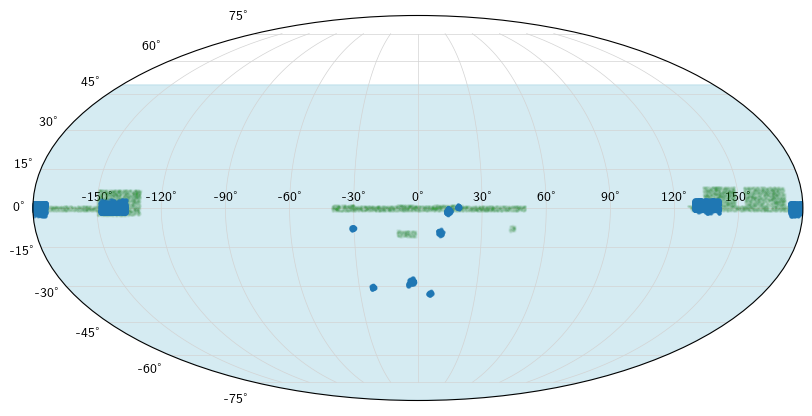

In [7]:
# construct a sky map showing survey regions:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="mollweide")
plt.grid(True, which='major', color='lightgrey', lw=0.5)


ra_bounds = -35*u.degree, 35*u.degree
dec_bounds = -40*u.degree, 10*u.degree


plt.plot(LARGESS_coordinates.ra.wrap_at(180*u.degree).radian, LARGESS_coordinates.dec.radian, 'o', markersize=1, alpha=0.02, label='LARGESS', color='C2')
plt.plot(SAMI_coordinates.ra.wrap_at(180*u.degree).radian, SAMI_coordinates.dec.radian, 'o', markersize=2, alpha=0.5, label='SAMI', color='C0')

# plotting the RACS region
# Dec cutoff
RACS_Dec_cutoff_deg = 49
RACS_Dec_cutoff = np.radians(RACS_Dec_cutoff_deg)
RAs = np.linspace(-np.pi, np.pi, 500)

# Build polygon for the shaded region: full width of lon, from min to cutoff
Decs = np.full_like(RAs, RACS_Dec_cutoff)
RAs_full = np.concatenate([RAs, RAs[::-1]])
print(RAs_full)
Decs_full = np.concatenate([Decs, np.full_like(RAs, -np.pi/2)])
ax.fill(RAs_full, Decs_full, color="lightblue", alpha=0.5)


# plotting the eRASS1 region
lon_bounds = np.array([359.94423568,179.94423568])*u.degree # bounds in galactic longitude
lat_values = np.linspace(-90, 90, 500)*u.degree

edge1 = SkyCoord(l=np.full_like(lat_values, lon_bounds[0]), b=lat_values, frame='galactic')
edge2 = SkyCoord(l=np.full_like(lat_values, lon_bounds[1]), b=lat_values[::-1], frame='galactic')
bottom = SkyCoord(l=np.linspace(lon_bounds[0].value, lon_bounds[1].value, 200) * u.deg,
                  b=-90 * u.deg, frame="galactic")
top = SkyCoord(l=np.linspace(lon_bounds[0].value, lon_bounds[1].value, 200) * u.deg,
               b=90 * u.deg, frame="galactic")
# polygon coords in galactic l, b
coords = SkyCoord(l=np.concatenate([top.l.degree, edge1.l.degree, edge2.l.degree, bottom.l.degree])*u.degree, b=np.concatenate([top.b.degree, edge1.b.degree, edge2.b.degree, bottom.b.degree])*u.degree, frame='galactic')

RAs_full = coords.icrs.ra.wrap_at(180*u.degree).radian
DECs_full = coords.icrs.dec.radian

ordering = np.argsort(RAs_full)
RAs_full = RAs_full[ordered]


ax.fill(RAs_full, DECs_full, color="lightgreen", alpha=1)

plt.show()

# plt.plot(bounded_SAMI_coordinates.ra.wrap_at(180*u.degree).degree, bounded_SAMI_coordinates.dec.degree, 'o', markersize=2, alpha=0.5, label='SAMI', color='C0')

# plt.plot(eRASS1_coordinates.ra.wrap_at(180*u.degree).radian, eRASS1_coordinates.dec.radian, 'o', markersize=1, alpha=0.005, label='eRASS1', color='C3')
# plt.plot(RACS_coordinates.ra.wrap_at(180*u.degree).radian, RACS_coordinates.dec.radian, 'o', markersize=1, alpha=0.005, label='RACS', color='C1')


# plt.xlim(ra_bounds[1].to(u.radian).value, ra_bounds[0].to(u.radian).value)
# plt.ylim(dec_bounds[0].to(u.radian).value, dec_bounds[1].to(u.radian).value)



# Survey Coverage Plots

[-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]


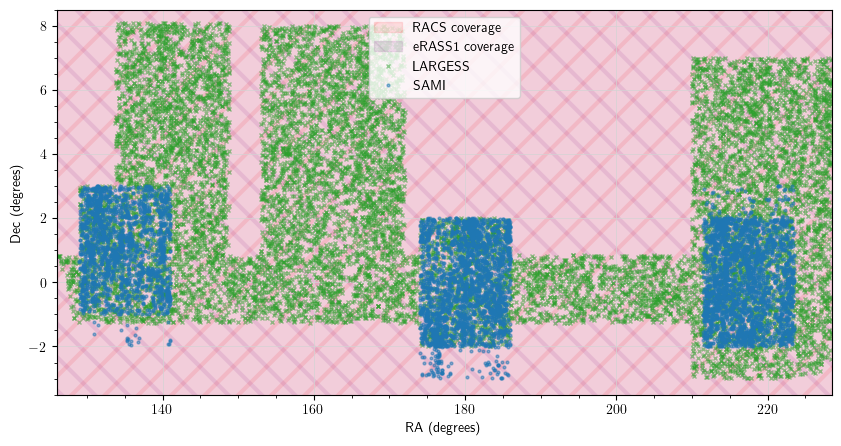

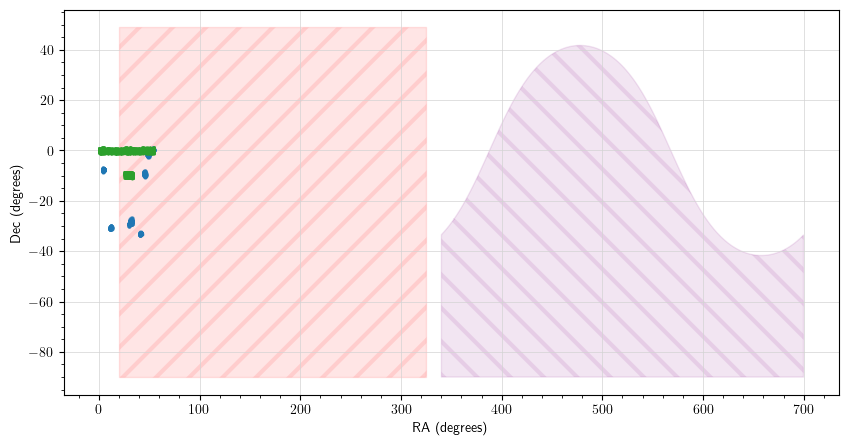

In [91]:
all_SAMI_targets_table = all_fctns.get_all_SAMI_targets_catalogue(catalogue_filepath)
SAMI_coordinates = SkyCoord(ra=all_SAMI_targets_table['RA_OBJ']*u.degree, dec=all_SAMI_targets_table['DEC_OBJ']*u.degree, frame='icrs')

with fits.open(catalogue_filepath + "LARGESS.fits") as LARGESS_hdul:
    LARGESS_table = Table(LARGESS_hdul[1].data)
LARGESS_coordinates = SkyCoord(ra=LARGESS_table['RAdeg']*u.degree, dec=LARGESS_table['DEdeg']*u.degree, frame='icrs')


LARGESS_colour = 'C2'
LARGESS_marker = 'x'
LARGESS_pointsize = 3

RACS_hatch = '/'
RACS_colour = 'red'
eRASS1_hatch = '\\'
eRASS1_colour = 'purple'
hatch_linewidth = 3

# GAMA regions
fig, ax = plt.subplots(1,1,figsize=(10, 5))

ra_bounds = np.array((126, 228.5))*u.deg
dec_bounds = np.array((-3.5, 8.5))*u.deg

SAMI_mask = (SAMI_coordinates.ra > ra_bounds[0]) & (SAMI_coordinates.ra < ra_bounds[1]) & (SAMI_coordinates.dec > dec_bounds[0]) & (SAMI_coordinates.dec < dec_bounds[1])
bounded_SAMI_coordinates = SAMI_coordinates[SAMI_mask]

LARGESS_mask = (LARGESS_coordinates.ra > ra_bounds[0]) & (LARGESS_coordinates.ra < ra_bounds[1]) & (LARGESS_coordinates.dec > dec_bounds[0]) & (LARGESS_coordinates.dec < dec_bounds[1])
bounded_LARGESS_coordinates = LARGESS_coordinates[LARGESS_mask]

# add RACS region: everything below Dec = 49 deg 
ax.fill_between(ra_bounds.value, -90, 49, color=RACS_colour, 
                alpha=0.1, hatch=RACS_hatch, hatch_linewidth=hatch_linewidth, label='RACS coverage')

# add eRASS1 region (cheating her because we know it fully covers already so just copy the RACS code)
ax.fill_between(ra_bounds.value, -90, 90, color=eRASS1_colour, 
                alpha=0.1, hatch=eRASS1_hatch, hatch_linewidth=hatch_linewidth, label='eRASS1 coverage')

ax.plot(bounded_LARGESS_coordinates.ra.deg, bounded_LARGESS_coordinates.dec.deg, LARGESS_marker, markersize=LARGESS_pointsize, alpha=0.5, label='LARGESS', color=LARGESS_colour)
ax.plot(bounded_SAMI_coordinates.ra.deg, bounded_SAMI_coordinates.dec.deg, 'o', markersize=2, alpha=0.5, label='SAMI', color='C0')


ax.minorticks_on()
ax.grid(True, which='major', color='lightgrey', lw=0.5)
ax.set_xlim(ra_bounds[0].value, ra_bounds[1].value)
ax.set_ylim(dec_bounds[0].value, dec_bounds[1].value)
ax.set_ylabel('Dec (degrees)')
ax.set_xlabel('RA (degrees)')
ax.legend()


# Cluster Regions:
fig, ax = plt.subplots(1,1,figsize=(10, 5))

ra_bounds = np.array((325, 20))*u.deg
dec_bounds = np.array((-35, 2))*u.deg

SAMI_mask = ( (SAMI_coordinates.ra > ra_bounds[0]) | (SAMI_coordinates.ra < ra_bounds[1]) ) & (SAMI_coordinates.dec > dec_bounds[0]) & (SAMI_coordinates.dec < dec_bounds[1])
bounded_SAMI_coordinates = SAMI_coordinates[SAMI_mask]


LARGESS_mask = ( (LARGESS_coordinates.ra > ra_bounds[0]) | (LARGESS_coordinates.ra < ra_bounds[1]) )& (LARGESS_coordinates.dec > dec_bounds[0]) & (LARGESS_coordinates.dec < dec_bounds[1])
bounded_LARGESS_coordinates = LARGESS_coordinates[LARGESS_mask]

# shifting ra to start at 0 at plot lim, so can then redefine axis
bounded_SAMI_ra = bounded_SAMI_coordinates.ra.wrap_at(ra_bounds[0]) + 360*u.deg - ra_bounds[0]
bounded_LARGESS_ra = bounded_LARGESS_coordinates.ra.wrap_at(ra_bounds[0]) + 360*u.deg - ra_bounds[0]

ax.plot(bounded_SAMI_ra, bounded_SAMI_coordinates.dec.deg, 'o', markersize=2, alpha=0.5, label='SAMI', color='C0')
ax.plot(bounded_LARGESS_ra, bounded_LARGESS_coordinates.dec.deg, 'o', markersize=1, alpha=0.5, label='LARGESS', color='C2')

# add RACS region: everything below Dec = 49 deg 
ax.fill_between(ra_bounds.value, -90, 49, color=RACS_colour, 
                alpha=0.1, hatch=RACS_hatch, hatch_linewidth=hatch_linewidth)

# add eRASS1 region - need the hemisphere dividing line
lon_bounds = np.array([359.94423568,179.94423568])*u.degree
b_vals = np.linspace(-90, 90, 500) * u.deg

# Build the line in Galactic coordinates
line_gal_180 = SkyCoord(l=np.full_like(b_vals, lon_bounds[1]),
                    b=b_vals,
                    frame='galactic')

line_gal_360 = SkyCoord(l=np.full_like(b_vals, lon_bounds[0]),
                    b=b_vals,
                    frame='galactic')

# Convert to RA/Dec (ICRS)
ra_line = np.concatenate([line_gal_180.icrs.ra, line_gal_360.icrs.ra])
dec_line = np.concatenate([line_gal_180.icrs.dec, line_gal_360.icrs.dec])

ordering = np.argsort(ra_line)
ordered_ra_line = ra_line[ordering]
ordered_dec_line = dec_line[ordering]


ax.fill_between( (ordered_ra_line.value+360-ra_bounds[1].value), -90, ordered_dec_line.value, color=eRASS1_colour, 
                alpha=0.1, hatch=eRASS1_hatch, hatch_linewidth=hatch_linewidth, label='eRASS1 coverage')


# ax.fill_between(ra_bounds.value, -90, 90, color=eRASS1_colour, 
                # alpha=0.1, hatch=eRASS1_hatch, hatch_linewidth=hatch_linewidth)

ax.minorticks_on()
ax.grid(True, which='major', color='lightgrey', lw=0.5)
# ax.set_xlim(0, ra_bounds[1].value - ra_bounds[0].value +360)
# ax.set_ylim(dec_bounds[0].value, dec_bounds[1].value)
ax.set_ylabel('Dec (degrees)')
ax.set_xlabel('RA (degrees)')

print(ax.get_xticks())


GAMA_region_bounds = [((129,-2), (141, 3)), ((174, -3), (186, 2)), ((211.5, -2), (223.5, 3))] # bounds of the GAMA target regions in the SAMI data including filler which are rectangular in shape (bottom left to top right coords) all in degrees




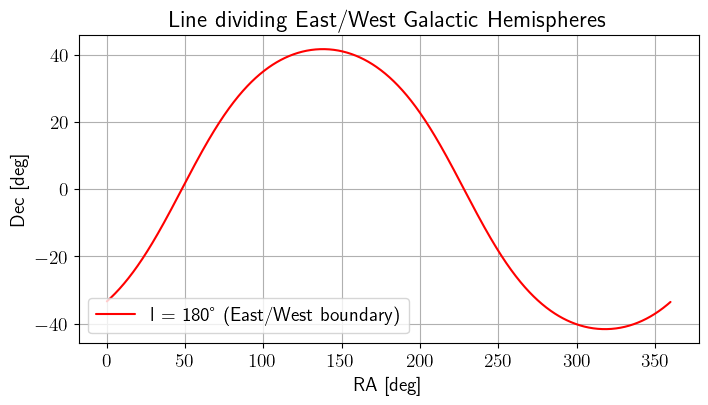

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

# Galactic longitude of the dividing line
l_divide = 180 * u.deg
b_vals = np.linspace(-90, 90, 500) * u.deg

# Build the line in Galactic coordinates
line_gal_180 = SkyCoord(l=np.full_like(b_vals.value, 180) * u.deg,
                    b=b_vals,
                    frame='galactic')

line_gal_360 = SkyCoord(l=np.full_like(b_vals.value, 360) * u.deg,
                    b=b_vals,
                    frame='galactic')

# Convert to RA/Dec (ICRS)
ra_line = np.concatenate([line_gal_180.icrs.ra, line_gal_360.icrs.ra])
dec_line = np.concatenate([line_gal_180.icrs.dec, line_gal_360.icrs.dec])

ordering = np.argsort(ra_line)
ordered_ra_line = ra_line[ordering]
ordered_dec_line = dec_line[ordering]

# Plot
plt.figure(figsize=(8,4))
plt.plot(ordered_ra_line, ordered_dec_line, color='red', label='l = 180° (East/West boundary)')
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.title("Line dividing East/West Galactic Hemispheres")
plt.grid(True)
plt.legend()
plt.show()


# Crossmatching Statistics

## LARGESS

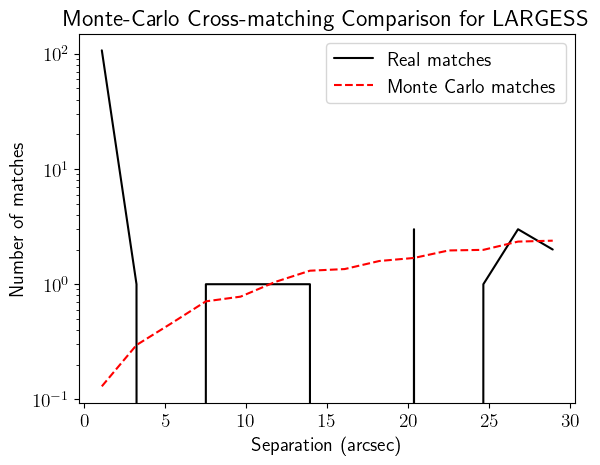

Genuine Matches: 107
Mean Random Matches: 0.11666666666666667
Reliability: 0.9989096573208722
Number of Missed Matches: 0.8966666666666667
Completeness: 0.9916895795359758


In [236]:
refresh_module()

# all_fctns.get_fits_table_SAMI_target_regions_cutout(Source_dir + "Catalogues\\", "LARGESS.fits", col_names=('RAdeg', 'DEdeg'), overwrite=True)

all_random_separations, real_separations = all_fctns.get_monte_carlo_separation_plot(Source_dir+"Catalogues\\", "LARGESS.fits", crossmatching_colnames=('RAdeg', 'DEdeg'), 
                                                                                         nbins=15, max_shifts=(0.1,0.01), n_trials=300)
plt.yscale('log')
plt.show()

all_fctns.get_montecarlo_statistics(all_random_separations, real_separations, matching_sep=2, intercept_point=7.5)


## RACS

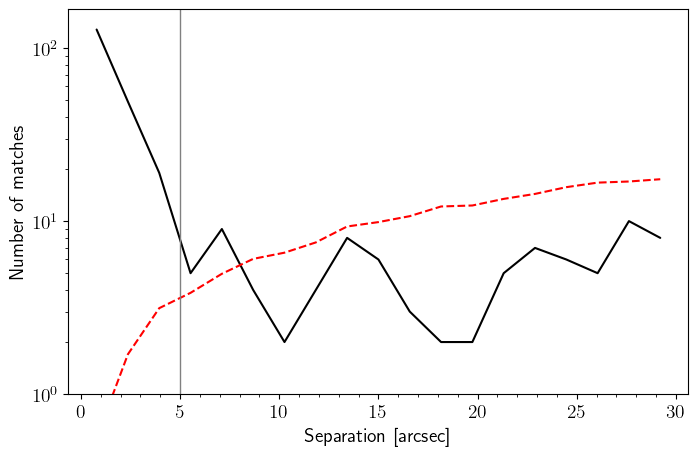

Genuine Matches: 196
Mean Random Matches: 5.89
Reliability: 0.9699489795918368
Number of Missed Matches: 3.63
Completeness: 0.981816360266493
Figure saved to C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Thesis\Images\RACSMonteCarloMatching.pdf


In [335]:
refresh_module()
# all_fctns.get_fits_table_SAMI_target_regions_cutout(Source_dir + "Catalogues\\", "RACS-mid1_sources.fits", col_names=('RA', 'Dec'), overwrite=True)

fig, ax = plt.subplots(figsize=(8, 5))
plt.rcParams['text.usetex'] = True
ax.minorticks_on()
all_random_separations, real_separations  = all_fctns.get_monte_carlo_separation_plot(Source_dir+"Catalogues\\", "RACS-mid1_sources.fits", crossmatching_colnames=('RA', 'Dec'), 
                                                                                         max_sep_arcsec=30, max_shifts=(0.01, 0.01), nbins=20)
plt.yscale('log')
plt.ylim(1, plt.ylim()[1])
# remove legend and title
plt.title('')
plt.legend().remove()

plt.axvline(5, color='grey', lw=1)


plt.show()

all_fctns.get_montecarlo_statistics(all_random_separations, real_separations, matching_sep=5, intercept_point=7)

# cutoff line

save_figure = True
if save_figure:
    figname = 'RACSMonteCarloMatching.pdf'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname, bbox_inches='tight', dpi=300)
    print(f"Figure saved to {savepath+ figname}")


## Radio Matches Table

In [250]:
# print number of RACS matches in GAMA and Clusters
print([region for region in SAMI_regions.values()])
print([np.sum((Summary_table_hdu['SAMI_REGION'] == region)) for region in SAMI_regions.values()])

print([np.sum(Summary_table_hdu['IS_LARGESSSOURCE'] * (Summary_table_hdu['SAMI_REGION'] == region)) for region in SAMI_regions.values()])
print([np.sum(Summary_table_hdu['IS_RACSSOURCE'] * (Summary_table_hdu['SAMI_REGION'] == region)) for region in SAMI_regions.values()])
print([np.sum( (Summary_table_hdu['IS_RADIOSOURCE']==1) & (Summary_table_hdu['SAMI_REGION'] == region)) for region in SAMI_regions.values()])



print("Number of RACS matches in GAMA region:", np.sum(Summary_table_hdu['IS_RACSSOURCE']==1 & (Summary_table_hdu['SAMI_REGION'] == 'GAMA')))
print("Number of RACS matches in Cluster region:", np.sum(Summary_table_hdu['IS_RACSSOURCE']==1 & (Summary_table_hdu['SAMI_REGION'] == 'Clusters')))
print("Number of RACS matches in Filler region:", np.sum( (Summary_table_hdu['IS_RACSSOURCE']==1) & (Summary_table_hdu['SAMI_REGION'] == 'Filler')))


# number of multi-component RACS sources
print("Number of multi-component RACS sources:", np.sum(Summary_table_hdu['RACS_SOURCE_CLASSIFICATION'] == 'M'))
print("Number of single-component RACS sources:", np.sum(Summary_table_hdu['RACS_SOURCE_CLASSIFICATION'] == 'S'))


['GAMA', 'Clusters', 'Filler']
[np.int64(2099), np.int64(896), np.int64(72)]
[np.int64(97), np.int64(10), np.int64(0)]
[np.int64(151), np.int64(46), np.int64(0)]
[np.int64(158), np.int64(49), np.int64(0)]
Number of RACS matches in GAMA region: 1074
Number of RACS matches in Cluster region: 2067
Number of RACS matches in Filler region: 0
Number of multi-component RACS sources: 49
Number of single-component RACS sources: 148


# BPT Classification Diagram

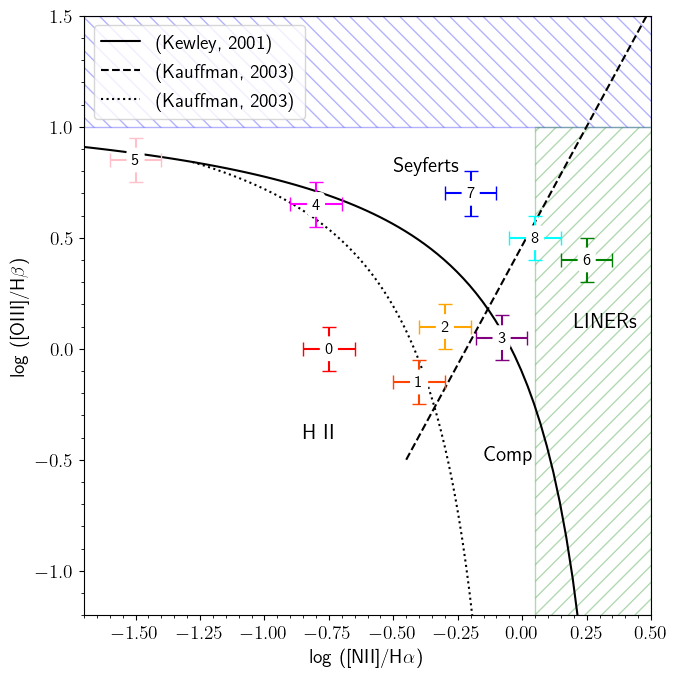

Figure saved to C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Thesis\Images\ExampleBPTClassifications.pdf


In [337]:
refresh_module()

fig, ax = plt.subplots(figsize=(7, 7))
plt.rcParams['text.usetex'] = True

label_fontsize = 12
regionlabel_fontsize = 15

# set the figure fontsize

# plt.scatter(data['log_NII_Ha'], data['log_OIII_Hb'], s=9, lw=0, alpha=0.5)

all_fctns.plot_BPT_lines(ax, 'N II', AGN_cutoffs=False, region_labels=False)


# region labels
ax.text(-0.5, 0.8, 'Seyferts', size = regionlabel_fontsize)
ax.text(0.2, 0.1, 'LINERs', size=regionlabel_fontsize)
ax.text(-0.15, -0.5, 'Comp', size=regionlabel_fontsize)
ax.text(-0.85, -0.4, 'H II', size=regionlabel_fontsize)


ax.grid(False)
ax.minorticks_on()
plt.ylim(-1.2, 1.5)
plt.xlim(-1.7, 0.5)
# plt.xticks(-1.75, 0.5, step=0.05)
            # -1 - S/N above threshold or no spectra for both axes \\
            # 0 - Star-forming \\
			# 1 - located on Star-forming / Composite region boundary \\
			# 2 - Composite \\
			# 3 - located on Composite / AGN region boundary \\
            # 4 - Located Across Star-forming / Composite / AGN regions \\
            # 5 - Located on Star-forming / AGN region boundary before intercept point in NII BPT\\
			# 6 - LINER \\
			# 7 - Seyfert \\
			# 8 - located on LINER / Seyfert boundary \\
            # 9 - AGN based only on O III / H\\beta \\
            # 10 - AGN based only on {metal} / H\\alpha \\

box_centres = ( (-0.75, 0), (-0.4, -0.15), (-0.3, 0.1), (-0.08, 0.05), (-0.8, 0.65), (-1.5, 0.85), (0.25, 0.4), (-0.2, 0.7), (0.05, 0.5) )
xerr, yerr = 0.1, 0.1

for value, (label, color, marker) in full_BPT_classification_dict.items():
    if value in (-1, 9, 10):
        continue
    box_centre = box_centres[value]
    ax.plot([], [], marker, color=color, label=label)
    # ax.text(box_centre[0], box_centre[1], value, fontsize=label_fontsize, color=color, ha='center', va='center', 
    #         bbox=dict(facecolor='None', edgecolor=color, boxstyle='square,pad=0.8', alpha=1))
    
    ax.errorbar(box_centre[0], box_centre[1], xerr=xerr, yerr=yerr, fmt='o', color=color, capsize=5)
    ax.text(box_centre[0], box_centre[1], value, ha='center', va='center',
        fontsize=label_fontsize, bbox=dict(facecolor="white", edgecolor="none", boxstyle='round,pad=0.3'))
    

# add the region cutoffs:
plot_xlims = plt.xlim()
plot_ylims = plt.ylim()
k01_OIII_Hb_AGN_bound = 1.0 #shouldn't vary with metal type
k01_metal_Ha_AGN_bounds = {'N II': 0.05, 'S II': -0.1, 'O I': -1.0}
metal = 'N II'

ax.fill_betweenx([k01_OIII_Hb_AGN_bound, plot_ylims[1]], plot_xlims[0], plot_xlims[1], facecolor='none', linewidth=1, alpha=0.3, hatch='\\\\', 
                 edgecolor=full_BPT_classification_dict[9][1])

ax.fill_betweenx([plot_ylims[0], k01_OIII_Hb_AGN_bound], k01_metal_Ha_AGN_bounds[metal], plot_xlims[1], facecolor='none', linewidth=1, alpha=0.3, hatch='//',
                 edgecolor=full_BPT_classification_dict[10][1], )



#     # Plot point with error bars
# ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color='black', capsize=10)

# # Add a number at the center of the error bars
# ax.text(x, y, "42", ha='center', va='center',
#         fontsize=12, bbox=dict(facecolor="white", edgecolor="none", pad=3))





plt.tight_layout()
plt.show()

save_figure = True
if save_figure:
    figname = 'ExampleBPTClassifications.pdf'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname, bbox_inches='tight', dpi=300)
    print(f"Figure saved to {savepath+ figname}")


# SAMI BPT Classifications

Number of galaxies with S/N > 5:
O III:     2294
H beta:    2131
H alpha:   2598

N II       2550
N II Total 1902

S II       2277
S II Total 1891

O I        1261
O I Total  1227



c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\sami_tools_smc_mspa4681\Code\all_fctns.py:39: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.72/(xbpt-0.31) + 1.30
c:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\sami_tools_smc_mspa4681\Code\all_fctns.py:44: RuntimeWarning: divide by zero encountered in divide
  ybpt = 0.73/(xbpt+0.59) + 1.33


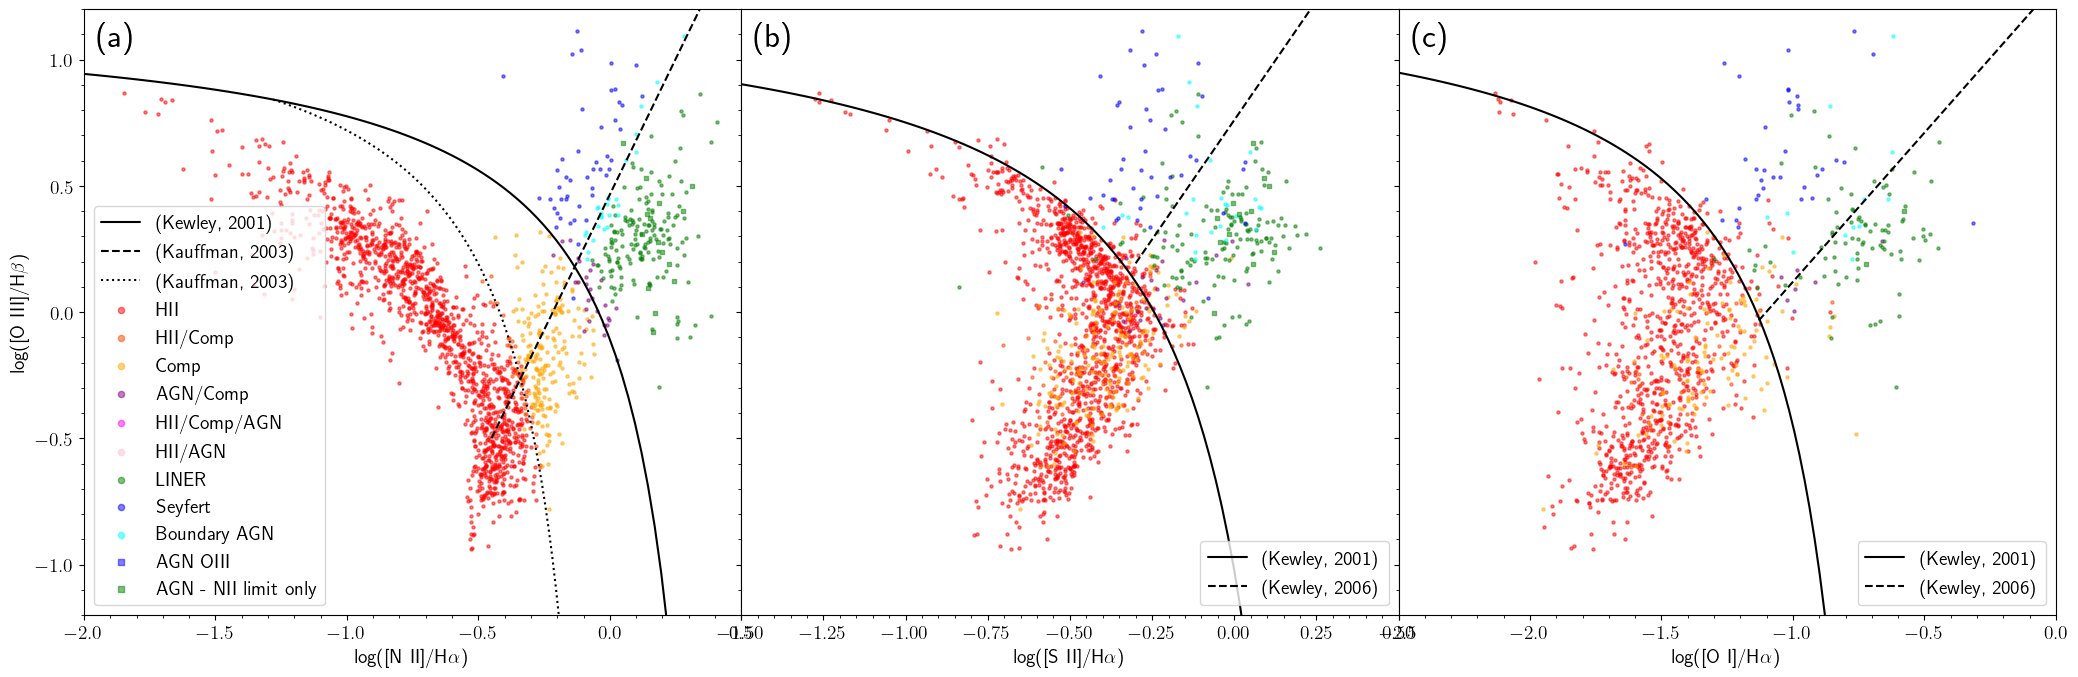

Figure saved to C:\Users\mspan\OneDrive - The University of Sydney (Students)\Honours\Honours Project\Thesis\Images\FullBPTResults.pdf


In [338]:
refresh_module()

SN_lim = 5


bpt_metals = ('N II', 'S II', 'O I')

# x limits to stop log from changing sign and div by 0
kewley_xlims = {'N II': 0.47, 'S II': 0.31, 'O I': -0.59} 
kauffman_xlims = [-1.3, 0.05]
Seyfert_LINER_line_startpoints = {'N II': -0.45, 'S II': -0.3, 'O I': -1.13}

height, width = 7, 21
fig, axs = plt.subplots(1, 3, figsize=(width, height), sharey=True, gridspec_kw={'wspace': 0})
plt.rcParams.update({'font.size': 14})  # sets default font size


# fig1.suptitle(f'BPT Diagrams of All SAMI Galaxies for 1.4 Arcsecond Aperture with S/N > {SN_lim}, Labelling by region in $[NII]/[H\\alpha]$ BPT', fontsize=10)

plot_xlims = {'N II': [-2, 0.5], 'S II': [-1.5, 0.5], 'O I': [-2.5, 0.0]} 
plot_ylims = [-1.2, 1.2]

BPT_classification_table = Summary_table_hdu.copy()
BPT_classification_table.keep_columns(['CATID', 'CATEGORY_BPT_AGN'])

BPT_classification_spectra_table = join(BPT_classification_table, SAMI_spectra_table_hdu, keys=['CATID'], join_type='left')

NII_galaxy_types = BPT_classification_spectra_table['CATEGORY_BPT_AGN']

# construct BPT for 1.4 sec aperture removing anything with S/N ratio greater than limit
OIII_flux, OIII_error = all_fctns.get_flux_and_error_1_4_ARCSEC(BPT_classification_spectra_table, 'O III')
HBeta_flux, HBeta_error = all_fctns.get_flux_and_error_1_4_ARCSEC(BPT_classification_spectra_table, 'H Beta')

BPT_y = np.log10(OIII_flux/HBeta_flux)

HAlpha_flux, HAlpha_error = all_fctns.get_flux_and_error_1_4_ARCSEC(BPT_classification_spectra_table, 'H Alpha')
print(f"Number of galaxies with S/N > {SN_lim}:")
print(f"{'O III:':10} {sum((OIII_flux/OIII_error > SN_lim))}")
print(f"{'H beta:':10} {sum((HBeta_flux/HBeta_error > SN_lim))}")
print(f"{'H alpha:':10} {sum((HAlpha_flux/HAlpha_error > SN_lim))}\n")


#testing
for i, metal in enumerate(bpt_metals):
    #for i, metal in enumerate(bpt_metals):
    metal_flux, metal_error = all_fctns.get_flux_and_error_1_4_ARCSEC(BPT_classification_spectra_table, metal)

    print(f"{metal:10} {sum((metal_flux/metal_error > SN_lim))}")

    SN_mask = (HBeta_flux/HBeta_error > SN_lim) & (OIII_flux/OIII_error > SN_lim) & (HAlpha_flux/HAlpha_error > SN_lim) & (metal_flux/metal_error > SN_lim)
    print(f"{f'{metal} Total':10} {sum(SN_mask)}\n")

    BPT_y = np.log10(OIII_flux/HBeta_flux)
    BPT_x = np.log10(metal_flux/HAlpha_flux)

    BPT_y_error = BPT_y * np.sqrt( (OIII_error/OIII_flux)**2+(HBeta_error/HBeta_flux)**2)
    BPT_x_error = BPT_x * np.sqrt( (metal_error/metal_flux)**2+(HAlpha_error/HAlpha_flux)**2)

    ax = axs.flatten()[i]

    all_fctns.plot_BPT_lines(ax, metal, have_legend=True, AGN_cutoffs=False, region_labels=False, plot_xlims=plot_xlims, plot_ylims=plot_ylims, axis_labels=False)
    ax.legend(loc='lower right')


    for bpt_value, (bpt_label, bpt_color, bpt_marker) in full_BPT_classification_dict.items():
        if bpt_value in (-1,):
            continue

        galaxy_type_mask = NII_galaxy_types == bpt_value
        
        if type(galaxy_type_mask) == bool:
            galaxy_type_mask = (galaxy_type_mask,)
        
        if len(galaxy_type_mask)==0:
            continue
        
        ax.scatter(BPT_x[SN_mask & galaxy_type_mask], BPT_y[SN_mask & galaxy_type_mask], marker=bpt_marker, c=bpt_color, s=5, label=bpt_label, alpha=0.5)

    ax.set(xlabel=f'log([{metal}]/H$\\alpha$)')
    ax.minorticks_on()
    ax.grid(False)

    if i ==0:
        ax.set(ylabel='log([O III]/H$\\beta$)')
        ax.legend(loc='lower left', markerscale=2)
    
    # add annotation a, b, c to each subplot
    ax.text(0.02, 0.98, f'({chr(97+i)})', transform=ax.transAxes, fontsize=24, verticalalignment='top')

fig.tight_layout()
plt.show()

# BPT_classification_spectra_table


save_figure = True
if save_figure:
    figname = 'FullBPTResults.pdf'
    savepath = Source_dir+ "Thesis\\Images\\"
    fig.savefig(savepath+ figname, bbox_inches='tight', dpi=300)
    print(f"Figure saved to {savepath+ figname}")

# HERG/LERG Statistics

In [191]:
refresh_module()
print("Number of radio galaxies:", np.sum(Summary_table_hdu['IS_RADIOSOURCE'] == 1))

print("Number of radio sources with HERG/LERG classification:", np.sum(np.isin(Summary_table_hdu['IS_HERG'], (-1, 0, 1))))
print("num of HERGs:", np.sum(Summary_table_hdu['IS_HERG']==1))
print("num of LERGs:", np.sum(Summary_table_hdu['IS_HERG']==0))
print("num of inconclusive:", np.sum(Summary_table_hdu['IS_HERG']==-1))

# get the number of radio galaxies that are HERG/LERG or inconclusive



Number of radio galaxies: 301
Number of radio sources with HERG/LERG classification: 301
num of HERGs: 58
num of LERGs: 212
num of inconclusive: 31


# Broadline Statistics

In [232]:
print(f"num of broadline AGN: {np.sum(Summary_table_hdu['IS_BROADLINE_AGN']==1)}")

num of broadline AGN: 12
